# Linear Regression 1 Year Mortality

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.linear_model import LinearRegression

%run ImportPlotFunctions.ipynb

## Load Data 1 Year Mortality

In [2]:
%run LoadData1Y.ipynb

Loaded 1 Year Train Sample:
X_train shape: (38857, 106)
y shape: (38857,)
Loaded 1 Year Test Sample:
X_test shape: (19139, 106)
y_test shape: (19139,)


## Linear Regression

In [3]:
clf = LinearRegression(
    n_jobs=-1,
).fit(X_train, y_train)

## Analyze Results

In [7]:
print("Score: ", clf.score(X_test, y_test))

Score:  0.32743651919843175


## Save Results

In [15]:
np.savetxt("y_score_1y_linreg.csv", clf.predict(X_test), delimiter=",")

## Feature Importance

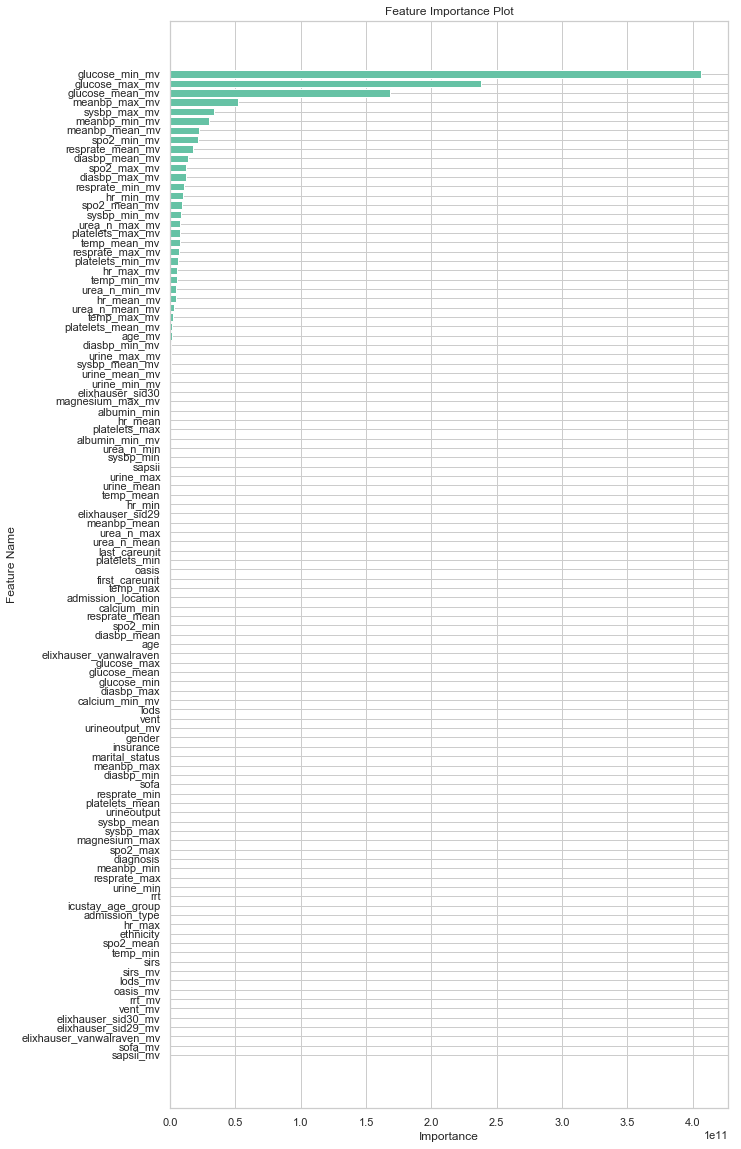

In [8]:
names = X_test.columns.tolist()
values = np.abs(clf.coef_)
feature_importance_bar(names, values, figsize=(10, 20))

## Precision Recall Curve

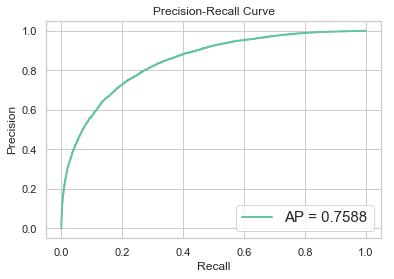

In [13]:
y_score = clf.predict(X_test)
average_precision = average_precision_score(y_test, y_score)
y_p = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_p)
plot_PRC(tpr, fpr, average_precision)

## ROC Curve

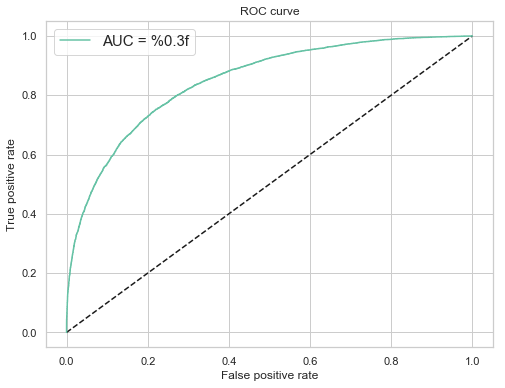

In [14]:
auc = auc(fpr, tpr)
plot_ROC(fpr, tpr, auc)